In [39]:
import os
from os.path import join, basename
from shutil import copyfile
import numpy as np
import pandas as pd
import rioxarray
import matplotlib.pyplot as plt

In [7]:
home_dir = '/SNOWDATA/uavsar/' #this needs to be a file path to the directory you want to save folders
url_dir = join(home_dir,'imgs' ,'urls','') #this should be a relative or full file path to where your urls are stored in txt or csv files
data_dir = join(home_dir,'imgs') #function might call this the out_dir
scratch_dir = '/home/zacharykeskinen/scratch/'
os.makedirs(data_dir, exist_ok=True)

In [13]:
locs = [ loc for loc in os.listdir(data_dir) if 'urls' not in loc]
for loc in locs:
    loc_dir = join(data_dir, loc)
    imgs = [img for img in os.listdir(loc_dir) if 'tmp' not in img]
    for img in imgs:
        img_dir = join(loc_dir, img)
        fps = [join(img_dir, fp) for fp in os.listdir(img_dir) if '.tif' in fp]
        
locs = [ loc for loc in os.listdir(data_dir) if 'urls' not in loc]
for loc in locs:
    loc_dir = join(data_dir, loc)
    imgs = [img for img in os.listdir(loc_dir) if 'tmp' not in img]
    for img in imgs:
        img_dir = join(loc_dir, img)
        csvs = [join(img_dir, fp) for fp in os.listdir(img_dir) if '.csv' in fp]
desc = pd.read_csv(csvs[0])

In [20]:
path = fps[0]
copyfile(fps[0], join(scratch_dir, basename(fps[0])))

/SNOWDATA/uavsar/imgs/lowman/lowman_05208_21019-019_21021-007_0006d_s01_L090_01_int/lowman_05208_21019-019_21021-007_0006d_s01_L090HH_01.amp1.real.tif


'/home/zacharykeskinen/scratch/lowman_05208_21019-019_21021-007_0006d_s01_L090HH_01.amp1.real.tif'

In [26]:
path = join(scratch_dir, os.listdir(scratch_dir)[0])

In [27]:
da = rioxarray.open_rasterio(path, masked=True)

In [28]:
# the rioxarray 'rio' accessor gives us access to geospatial information and other methods
crs = da.rio.crs
print(da.rio.encoded_nodata)
print('Upper left corner:')
print(da.rio.transform() * (0, 0)) 
print('Bounds of img: ')
print(da.rio.bounds())
left, bottom, right, top = da.rio.bounds()

None
Upper left corner:
(553859.6221955194, 4931021.2988628335)
Bounds of img: 
(553859.6221955194, 4822498.443121072, 674122.4174766277, 4931021.2988628335)


In [32]:
# Drop the 'band' dimension since we don't have multiband data
da = da.squeeze('band', drop=True)
da.name = 'amp1'
da

KeyError: 'band'

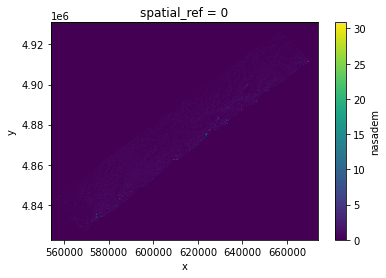

In [31]:
da.plot()

In [33]:
da.hvplot.image(rasterize = True) #rasterize = False

AttributeError: 'DataArray' object has no attribute 'hvplot'

In [36]:
arr = np.array(da)

In [37]:
arr.shape

(21603, 23940)

(array([[21603.,     0.,     0., ...,     0.,     0.,     0.],
        [21603.,     0.,     0., ...,     0.,     0.,     0.],
        [21603.,     0.,     0., ...,     0.,     0.,     0.],
        ...,
        [21603.,     0.,     0., ...,     0.,     0.,     0.],
        [21603.,     0.,     0., ...,     0.,     0.,     0.],
        [21603.,     0.,     0., ...,     0.,     0.,     0.]]),
 array([ 0.       ,  3.0866494,  6.173299 ,  9.259948 , 12.346598 ,
        15.433247 , 18.519896 , 21.606544 , 24.693195 , 27.779844 ,
        30.866493 ], dtype=float32),
 <a list of 23940 BarContainer objects>)

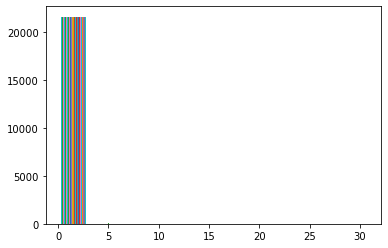

In [40]:
plt.hist(arr)

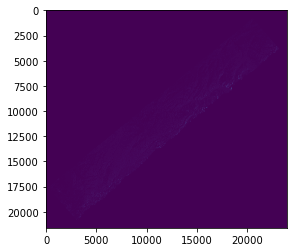

In [42]:
plt.imshow(arr)